In [21]:

# basic packages
import pandas as pd
import numpy as np
import datetime as dt
from pytz import timezone
import urllib
import os
import math

import matplotlib.pyplot as plt



In [22]:

file_path = './Indoor and outdoor air temperature data/HT1/Indoor air temperatures/House 1.xlsx'
file_path1 = './Indoor and outdoor air temperature data/HT1/Indoor air temperatures/House 2.xlsx'

file_path2 = './Indoor and outdoor air temperature data/HT2/Indoor air temperatures/House 1.xlsx'
file_path3 = './Indoor and outdoor air temperature data/HT2/Indoor air temperatures/House 2.xlsx'

file_path4 = './Indoor and outdoor air temperature data/HT1/Outdoor temperature sensor.xlsx'
file_path5 = './Indoor and outdoor air temperature data/HT2/Outdoor temperature sensor.xlsx'


# heating trial one
house1_indoor_ht1 = pd.read_excel(file_path)
house2_indoor_ht1 = pd.read_excel(file_path1)
outdoor_ht1 = pd.read_excel(file_path4)


# heating trial two
house1_indoor_ht2 = pd.read_excel(file_path2)
house2_indoor_ht2 = pd.read_excel(file_path3)
outdoor_ht2 = pd.read_excel(file_path4)





In [23]:
import pandas as pd

# Assuming you have loaded the dataframes as described
# Combine outdoor temperature with indoor temperatures for heating trial one (HT1)
house1_indoor_ht1 = pd.merge(house1_indoor_ht1, outdoor_ht1, on='Timestamp', how='inner', suffixes=('_indoor', '_outdoor'))
house2_indoor_ht1 = pd.merge(house2_indoor_ht1, outdoor_ht1, on='Timestamp', how='inner', suffixes=('_indoor', '_outdoor'))

# Combine outdoor temperature with indoor temperatures for heating trial two (HT2)
house1_indoor_ht2 = pd.merge(house1_indoor_ht2, outdoor_ht2, on='Timestamp', how='inner', suffixes=('_indoor', '_outdoor'))
house2_indoor_ht2 = pd.merge(house2_indoor_ht2, outdoor_ht2, on='Timestamp', how='inner', suffixes=('_indoor', '_outdoor'))

house1_indoor_ht1


,Timestamp,Kitchen,Bathroom,Bedroom 1,Hallway ground,bedroom 2,Unocupied bedroom,Living Room,dining room,hallway first,outdoor temperature
0,2014-02-16 00:00:00,19.376912,14.160994,16.652450,17.900976,15.515100,11.682342,18.044056,17.724594,18.847010,3.661746
1,2014-02-16 00:01:00,19.377492,14.150844,16.646042,17.867950,15.469046,11.684520,18.006050,17.697976,18.797534,3.670968
2,2014-02-16 00:02:00,19.374954,14.139652,16.617404,17.817216,15.497530,11.680136,17.999712,17.675732,18.781676,3.638799
3,2014-02-16 00:03:00,19.358712,14.148298,16.594654,17.788142,15.467390,11.651566,17.969392,17.661566,18.731292,3.573268
4,2014-02-16 00:04:00,19.366206,14.128984,16.584168,17.740808,15.406806,11.658586,17.931542,17.643696,18.711974,3.596674
...,...,...,...,...,...,...,...,...,...,...,...
40316,2014-03-15 23:56:00,21.127664,15.340706,17.823486,19.770176,18.748702,16.957960,20.010110,19.018354,20.567710,9.889340
40317,2014-03-15 23:57:00,21.146934,15.320654,17.812878,19.748364,18.727024,16.952014,19.976974,19.004402,20.565130,9.888942
40318,2014-03-15 23:58:00,21.103684,15.337456,17.802236,19.736446,18.721812,16.956182,19.967114,18.999110,20.533866,9.880976
40319,2014-03-15 23:59:00,21.096802,15.329330,17.812878,19.713990,18.722424,16.956794,19.969962,19.000426,20.485838,9.811308


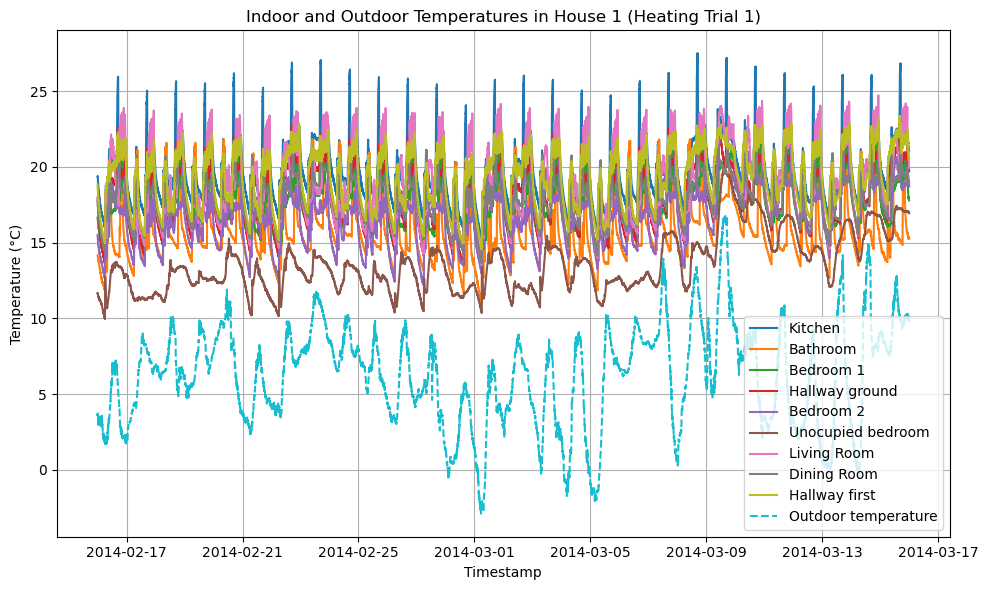

In [24]:
import matplotlib.pyplot as plt

# Convert 'Timestamp' column to datetime
house1_indoor_ht1['Timestamp'] = pd.to_datetime(house1_indoor_ht1['Timestamp'])

# Plotting
plt.figure(figsize=(10, 6))

# Plot indoor temperatures
plt.plot(house1_indoor_ht1['Timestamp'], house1_indoor_ht1['Kitchen'], label='Kitchen')
plt.plot(house1_indoor_ht1['Timestamp'], house1_indoor_ht1['Bathroom'], label='Bathroom')
plt.plot(house1_indoor_ht1['Timestamp'], house1_indoor_ht1['Bedroom 1'], label='Bedroom 1')
plt.plot(house1_indoor_ht1['Timestamp'], house1_indoor_ht1['Hallway ground'], label='Hallway ground')
plt.plot(house1_indoor_ht1['Timestamp'], house1_indoor_ht1['bedroom 2'], label='Bedroom 2')
plt.plot(house1_indoor_ht1['Timestamp'], house1_indoor_ht1['Unocupied bedroom'], label='Unocupied bedroom')
plt.plot(house1_indoor_ht1['Timestamp'], house1_indoor_ht1['Living Room'], label='Living Room')
plt.plot(house1_indoor_ht1['Timestamp'], house1_indoor_ht1['dining room'], label='Dining Room')
plt.plot(house1_indoor_ht1['Timestamp'], house1_indoor_ht1['hallway first'], label='Hallway first')

# Plot outdoor temperature
plt.plot(house1_indoor_ht1['Timestamp'], house1_indoor_ht1['outdoor temperature'], label='Outdoor temperature', linestyle='--')

# Add labels and title
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title('Indoor and Outdoor Temperatures in House 1 (Heating Trial 1)')
plt.legend()
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


In [28]:
# Copyright (c) 2016 Jamie Bull
# =======================================================================
#  Distributed under the MIT License.
#  (See accompanying file LICENSE or copy at
#  http://opensource.org/licenses/MIT)
# =======================================================================
"""
Class to run IDF objects in EnergyPlus.

"""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from __future__ import unicode_literals

import distutils.spawn
import logging
import os
import platform
from pprint import pprint
from subprocess import CalledProcessError
from subprocess import check_call
import tempfile


def find_version():
    """Get the installed EnergyPlus version number.
    """
    energyplus = distutils.spawn.find_executable('energyplus')
    if not energyplus:
        raise AttributeError
    energyplus = os.path.realpath(energyplus)  # follow links in /usr/bin
    folder = os.path.dirname(energyplus)
    version = os.path.basename(folder)[-5:]
#    version = version.replace('.', '-')
#    assert version[1] == '-' and version[3] == '-'

    return version

try:
    VERSION = os.environ["ENERGYPLUS_INSTALL_VERSION"]  # used in CI file)
except KeyError:
    VERSION = find_version()

if platform.system() == 'Windows':
    EPLUS_HOME = "C:/EnergyPlusV{VERSION}".format(**locals())
    EPLUS_EXE = os.path.join(EPLUS_HOME, 'energyplus.exe')
elif platform.system() == "Linux":
    EPLUS_HOME = "/usr/local/EnergyPlus-{VERSION}".format(**locals())
    EPLUS_EXE = os.path.join(EPLUS_HOME, 'energyplus')
else:
    EPLUS_HOME = "/Applications/EnergyPlus-2{VERSION}".format(**locals())
    EPLUS_EXE = os.path.join(EPLUS_HOME, 'energyplus')

EPLUS_WEATHER = os.path.join(EPLUS_HOME, 'WeatherData')
THIS_DIR = os.path.abspath(os.path.dirname('./Users/alexmellers/Documents/GitHub/datascience/BUILDING ENERGY MODELLING/building_energy_modelling.ipynb'))


def run(idf=None, weather=None, output_directory='', annual=False,
        design_day=False, idd=None, epmacro=False, expandobjects=False,
        readvars=False, output_prefix=None, output_suffix=None, version=False,
        verbose='v'):
    """
    Wrapper around the EnergyPlus command line interface.

    Parameters
    ----------
    idf : str
        Full or relative path to the IDF file to be run.

    weather : str
        Full or relative path to the weather file.

    output_directory : str, optional
        Full or relative path to an output directory (default: 'run_outputs)

    annual : bool, optional
        If True then force annual simulation (default: False)

    design_day : bool, optional
        Force design-day-only simulation (default: False)

    idd : str, optional
        Input data dictionary (default: Energy+.idd in EnergyPlus directory)

    epmacro : str, optional
        Run EPMacro prior to simulation (default: False).

    expandobjects : bool, optional
        Run ExpandObjects prior to simulation (default: False)

    readvars : bool, optional
        Run ReadVarsESO after simulation (default: False)

    output_prefix : str, optional
        Prefix for output file names (default: eplus)

    output_suffix : str, optional
        Suffix style for output file names (default: L)
            L: Legacy (e.g., eplustbl.csv)
            C: Capital (e.g., eplusTable.csv)
            D: Dash (e.g., eplus-table.csv)

    version : bool, optional
        Display version information (default: False)

    verbose: str
        Set verbosity of runtime messages (default: v)
            v: verbose
            q: quiet

    Returns
    -------
    str : status

    Raises
    ------
    CalledProcessError

    """
    args = locals().copy()
    if version:
        # just get EnergyPlus version number and return
        cmd = [EPLUS_EXE, '--version']
        check_call(cmd)
        return

    # get unneeded params out of args ready to pass the rest to energyplus.exe
    verbose = args.pop('verbose')
    idf = os.path.abspath(args.pop('idf'))

    # convert paths to absolute paths if required
    if os.path.isfile(args['weather']):
        args['weather'] = os.path.abspath(args['weather'])
    else:
        args['weather'] = os.path.join(EPLUS_WEATHER, args['weather'])
    args['output_directory'] = os.path.abspath(args['output_directory'])

    # store the directory we start in
    cwd = os.getcwd()
    run_dir = os.path.abspath(tempfile.mkdtemp())
    os.chdir(run_dir)

    # build a list of command line arguments
    cmd = [EPLUS_EXE]
    for arg in args:
        if args[arg]:
            if isinstance(args[arg], bool):
                args[arg] = ''
            cmd.extend(['--{}'.format(arg.replace('_', '-'))])
            if args[arg] != "":
                cmd.extend([args[arg]])
    cmd.extend([idf])

    try:
        if verbose == 'v':
            check_call(cmd)
        elif verbose == 'q':
            check_call(cmd, stdout=open(os.devnull, 'w'))
    except CalledProcessError as e:
        # potentially catch contents of std out and put it in the error
        logging.error(e, exc_info=True)
        raise
    except IOError as e:
        logging.error(e, exc_info=True)
        raise
    except OSError as e:
        logging.error(e, exc_info=True)
        for c in cmd:
            print(c)
        raise
    finally:
        os.chdir(cwd)
    return 'OK'

IDF_DIR = '/Users/alexmellers/Documents/GitHub/datascience/BUILDING_ENERGY_MODELLING/'

idf_path = os.path.join(IDF_DIR, '1ZoneUncontrolled_win_1.idf')
weather_path = os.path.join(IDF_DIR, 'GBR_ENG_Nottingham-East.Midlands.AP.034185_TMYx.2004-2018.epw')

# Run the EnergyPlus simulation
status = run(
    idf=idf_path,
    weather=weather_path,
    output_directory='/Users/alexmellers/Documents/GitHub/datascience/BUILDING_ENERGY_MODELLING/output/',
    annual=False,
    design_day=False,
    idd=None,
    epmacro=False,
    expandobjects=False,
    readvars=False,
    output_prefix=None,
    output_suffix=None,
    version=False,
    verbose='v'
)

Program terminated: EnergyPlus Terminated--Error(s) Detected.
ERROR:root:Command '['/Applications/EnergyPlus-23-2-0/energyplus', '--weather', '/Users/alexmellers/Documents/GitHub/datascience/BUILDING_ENERGY_MODELLING/GBR_ENG_Nottingham-East.Midlands.AP.034185_TMYx.2004-2018.epw', '--output-directory', '/Users/alexmellers/Documents/GitHub/datascience/BUILDING_ENERGY_MODELLING/output', '/Users/alexmellers/Documents/GitHub/datascience/BUILDING_ENERGY_MODELLING/1ZoneUncontrolled_win_1.idf']' returned non-zero exit status 1.
Traceback (most recent call last):
  File "/var/folders/s4/22x3mwpj4bldz0pl87jpf5th0000gn/T/ipykernel_2152/614319652.py", line 158, in run
    check_call(cmd)
  File "/opt/miniconda3/lib/python3.9/subprocess.py", line 373, in check_call
    raise CalledProcessError(retcode, cmd)
subprocess.CalledProcessError: Command '['/Applications/EnergyPlus-23-2-0/energyplus', '--weather', '/Users/alexmellers/Documents/GitHub/datascience/BUILDING_ENERGY_MODELLING/GBR_ENG_Nottingham-

EnergyPlus Starting
EnergyPlus, Version 23.2.0-7636e6b3e9, YMD=2024.04.05 14:59
Adjusting Air System Sizing
Adjusting Standard 62.1 Ventilation Sizing
Initializing Simulation


CalledProcessError: Command '['/Applications/EnergyPlus-23-2-0/energyplus', '--weather', '/Users/alexmellers/Documents/GitHub/datascience/BUILDING_ENERGY_MODELLING/GBR_ENG_Nottingham-East.Midlands.AP.034185_TMYx.2004-2018.epw', '--output-directory', '/Users/alexmellers/Documents/GitHub/datascience/BUILDING_ENERGY_MODELLING/output', '/Users/alexmellers/Documents/GitHub/datascience/BUILDING_ENERGY_MODELLING/1ZoneUncontrolled_win_1.idf']' returned non-zero exit status 1.